In [ ]:
# PART B

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [4]:
def a():
    df = pd.DataFrame(5*np.random.rand(100,10))
    df.columns = [1,2,3,4,5,6,7,8,9,10]
    df.to_csv('a', sep='\t')
    return df

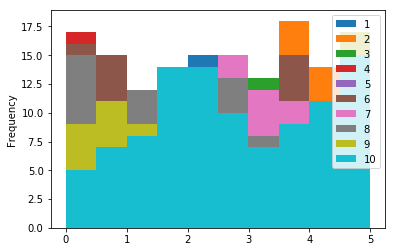

In [5]:
A = a()

A.plot.hist()
plt.show()

In [6]:
e = np.cov(A)

In [7]:
from scipy import linalg 
evals, evecs = linalg.eig(e)

/anaconda2/lib/python2.7/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


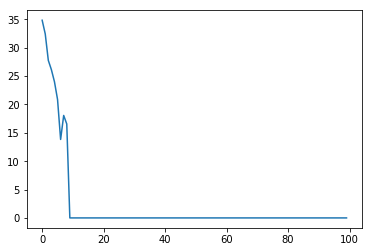

In [8]:
plt.plot(evals)
plt.show()

In [9]:
from matplotlib.mlab import PCA
 
def biplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n=coeff.shape[0]
    scalex = 1.0/(xs.max()- xs.min())
    scaley = 1.0/(ys.max()- ys.min())
    plt.scatter(xs*scalex,ys*scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color='r',alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color='g', ha='center', va='center')
            plt.xlim(-1,1)
            plt.ylim(-1,1)
            plt.xlabel("PC{}".format(1))
            plt.ylabel("PC{}".format(2))
            plt.grid()

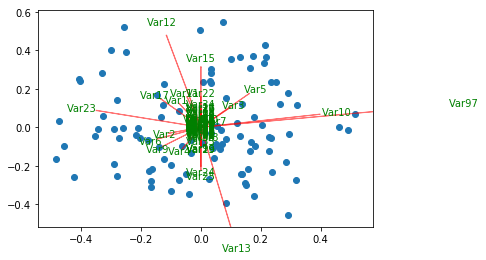

In [10]:
pca=PCA(e)
 
biplot(pca.Y[:,0:2],pca.Wt[:,0:2])
plt.show()

In [13]:
U,S,V = np.linalg.svd(A,full_matrices=False)
print("\n verify A=U*diag(S)*V \n")
A1=np.asmatrix(U)*np.asmatrix(np.diag(S))*np.asmatrix(V)
print(A1)
print("\n the original A\n" + str(A))


 verify A=U*diag(S)*V 

[[  7.35825187e-01   2.10756775e+00   3.38206651e+00   3.78186096e-01
    2.50146760e+00   8.41699212e-01   3.04547347e-01   2.05294421e-01
    1.10496538e+00   4.79421488e+00]
 [  1.76278277e+00   4.38874543e+00   3.87909050e+00   2.05021608e+00
    1.70668017e+00   2.88228604e-01   2.46149245e+00   5.85469983e-01
    3.24507246e+00   3.76478089e+00]
 [  1.99896457e+00   4.37286762e+00   3.10139874e+00   9.59992405e-02
    1.30927455e+00   4.17225479e+00   2.78175099e+00   4.84625676e+00
    2.32876439e+00   4.89766782e+00]
 [  2.86536964e+00   1.48541483e+00   3.39691570e+00   3.76386326e+00
    3.95445965e+00   7.10324819e-01   3.15522365e+00   1.51074964e+00
    4.19666629e+00   1.73429709e+00]
 [  2.67924473e+00   3.62706131e+00   1.75633494e+00   3.45434413e+00
    5.58340566e-02   4.71495883e+00   4.44410460e+00   1.15480608e+00
    1.79198074e+00   2.57194304e-01]
 [  3.71080212e+00   3.73060119e+00   3.83662207e+00   2.93656359e+00
    4.91647249e+00  

In [2]:
print(U)

NameError: name 'U' is not defined

In [36]:
print('All numbers in the first column of U are negative, and they can transfered to be all nonnegative. And it means that the U can be used as a ranking algorithm.\n')

All numbers in the first column of U are negative, and they can transfered to be all nonnegative. And it means that the U can be used as a ranking algorithm.



In [ ]:
#PART C

In [22]:
X = np.mat("1,2,0;7.2,5,9;-3,100,5.8;1,-90,9.7;2,88,1.2")

In [23]:
X

matrix([[   1. ,    2. ,    0. ],
        [   7.2,    5. ,    9. ],
        [  -3. ,  100. ,    5.8],
        [   1. ,  -90. ,    9.7],
        [   2. ,   88. ,    1.2]])

In [24]:
from scipy import linalg 
X_cov = np.cov(X.T)
print("This is the covariance matrix:\n")
print(X_cov)

This is the covariance matrix:

[[  1.33480000e+01  -8.70500000e+01   4.33800000e+00]
 [ -8.70500000e+01   5.91700000e+03  -1.70525000e+02]
 [  4.33800000e+00  -1.70525000e+02   1.95180000e+01]]


In [25]:
Variance, Pcs = np.linalg.eig(X_cov)
print(str(Variance.T)+'\n')
print(Pcs)

[ 5923.21143004    11.10961613    15.54495383]

[[ -1.47430660e-02   8.85912206e-01   4.63618599e-01]
 [  9.99474153e-01  -3.35232594e-04   3.24238504e-02]
 [ -2.88801049e-02  -4.63852834e-01   8.85441409e-01]]


In [24]:
UxU_t = np.dot(U,U.T)
print("U*U'= \n"+ str(UxU_t))

U*U'= 
[[  1.00000000e+00   2.33230385e-17  -3.56509244e-17 ...,  -1.36783844e-18
   -1.38777878e-17  -6.93889390e-18]
 [  2.33230385e-17   1.00000000e+00   1.12155662e-16 ...,  -1.70879204e-17
   -8.67361738e-18  -8.32667268e-17]
 [ -3.56509244e-17   1.12155662e-16   1.00000000e+00 ...,  -2.67720289e-17
    6.93889390e-18   1.11022302e-16]
 ..., 
 [ -1.36783844e-18  -1.70879204e-17  -2.67720289e-17 ...,   1.00000000e+00
   -1.64798730e-17   2.08166817e-17]
 [ -1.38777878e-17  -8.67361738e-18   6.93889390e-18 ...,  -1.64798730e-17
    1.00000000e+00   2.08166817e-17]
 [ -6.93889390e-18  -8.32667268e-17   1.11022302e-16 ...,   2.08166817e-17
    2.08166817e-17   1.00000000e+00]]


In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(X)

newdata = pca.transform(X)
print(newdata)

[[  18.8321296    -5.4639379    -1.82358917]
 [  16.18503509    5.47674164   -3.14056365]
 [ -79.00780501    0.99468521    4.44325888]
 [ 111.06388865    0.14184953    2.64494192]
 [ -67.07324833   -1.14933848   -2.12404797]]


In [33]:
X1 = pca.inverse_transform(newdata)
print(X1)

[[  1.00000000e+00   2.00000000e+00  -1.77635684e-15]
 [  7.20000000e+00   5.00000000e+00   9.00000000e+00]
 [ -3.00000000e+00   1.00000000e+02   5.80000000e+00]
 [  1.00000000e+00  -9.00000000e+01   9.70000000e+00]
 [  2.00000000e+00   8.80000000e+01   1.20000000e+00]]


In [36]:
print(X.T)

[[   1.     7.2   -3.     1.     2. ]
 [   2.     5.   100.   -90.    88. ]
 [   0.     9.     5.8    9.7    1.2]]


In [37]:
XxX_t = np.dot(X.T,X)
print("X*X'= \n"+ str(XxX_t))

X*X'= 
[[    66.84   -176.       59.5 ]
 [  -176.    25873.     -142.4 ]
 [    59.5    -142.4     210.17]]


In [38]:
U1,S1,V1 = np.linalg.svd(X)

In [39]:
P,D,B = np.linalg.svd(XxX_t)

In [40]:
PxP_t = np.dot(P,B)
print(PxP_t)

[[  1.00000000e+00   7.35047711e-16  -2.77555756e-16]
 [ -8.13180631e-16   1.00000000e+00  -2.03027699e-15]
 [ -5.55111512e-17   1.90125693e-15   1.00000000e+00]]


In [41]:
print(S1)

[ 160.85706342   15.17207046    6.69502984]


In [42]:
print(D)

[ 25874.99485345    230.19172194     44.82342461]


In [43]:
n = np.divide(D,S1)

In [44]:
print(n)

[ 160.85706342   15.17207046    6.69502984]
